In [2]:
import numpy as np 
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("C:/Users/User/Downloads/movies.csv/movies.csv",header=0)

In [6]:
df.shape

(9999, 9)

In [7]:
df.sample()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6454,Graffiti Verite' 10: Hip-Hop Dance,(2010),\nDocumentary,NaN,\nExplores all genres of Dance known as Hip Ho...,\n Director:\nBob Bryan\n| \n Stars:\nKe...,NaN,75.0,NaN


In [8]:
df.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [9]:
#finding the datatype of each feature

df.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object

In [10]:
df.isnull().sum() 

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [11]:

replace=df['YEAR'].fillna(df["YEAR"].mode()[0],inplace=True)
replace=df['GENRE'].fillna(df["GENRE"].mode()[0],inplace=True)
replace=df['VOTES'].fillna(df["VOTES"].mode()[0],inplace=True)
replace=df['Gross'].fillna(df["Gross"].mode()[0],inplace=True)

In [12]:
# separating a categorical column from numerical columns

df1=df.select_dtypes(exclude=['object'])

In [13]:
df2=df.select_dtypes(exclude=['float64','int64'])

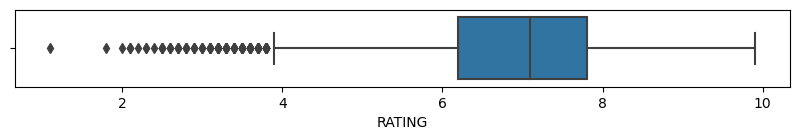

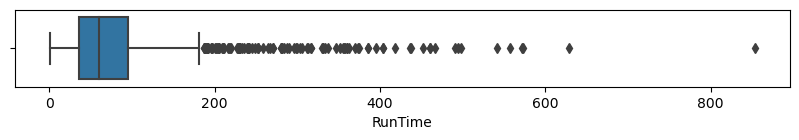

In [14]:
# Applying a box-plot to check the outliers
for column in df1:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=df1,x=column)

In [15]:
import numpy as np

def remove_outliers(df1):
    """
    Removes outliers from a given dataset using the Z-score method.
    
    :param data: a 1D numpy array of data
    :return: a 1D numpy array with outliers removed
    """
    # Calculate the Z-scores
    z_scores = np.abs((df1 - np.mean(df1)) / np.std(df1))

    # Define a threshold for outlier detection
    threshold = 5.0

    # Identify the outliers
    outliers = z_scores > threshold

    # Remove the outliers
    cleaned_data = df1[~outliers]

    return cleaned_data


In [16]:
# Remove outliers
cleaned_data = remove_outliers(df1)

# Print the cleaned data
print(cleaned_data)

      RATING  RunTime
0        6.1    121.0
1        5.0     25.0
2        8.2     44.0
3        9.2     23.0
4        NaN      NaN
...      ...      ...
9994     NaN      NaN
9995     NaN      NaN
9996     NaN      NaN
9997     NaN      NaN
9998     NaN      NaN

[9999 rows x 2 columns]


D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


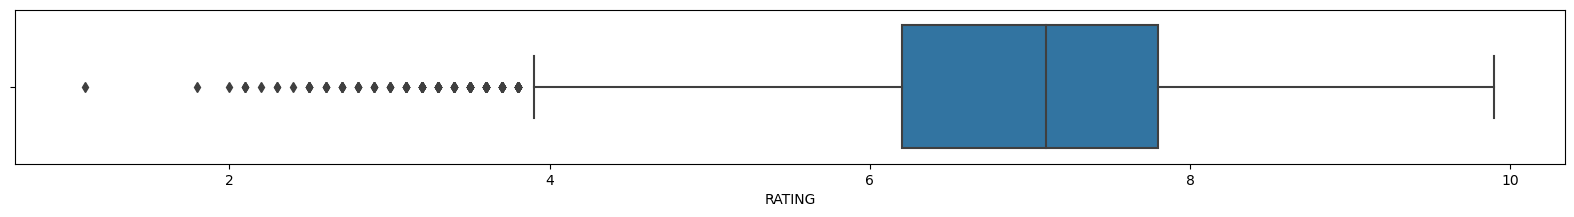

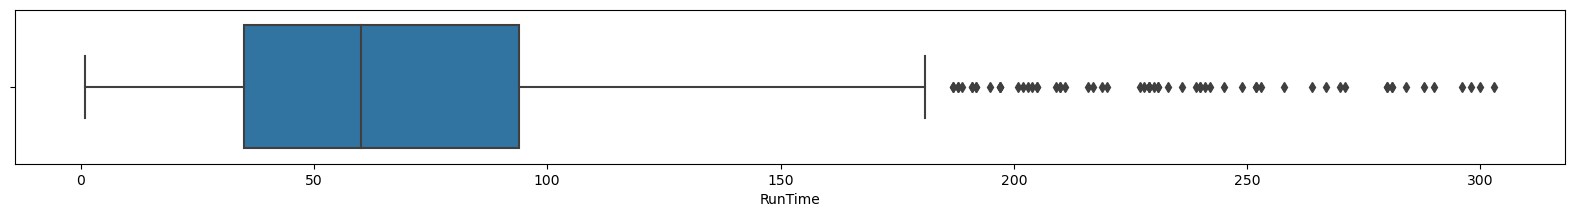

In [17]:
# Applying a box-plot to check the outliers
for column in df1:
    plt.figure(figsize=(20,2))
    sns.boxplot(data=cleaned_data,x=column)

In [18]:
df1.isnull().sum()

RATING     1820
RunTime    2958
dtype: int64

In [19]:
# missing value treatment using median
median_rating = df1['RATING'].median()
df1['RATING'] = df1['RATING'].fillna(median_rating)


In [20]:
median_runtime = df1['RunTime'].median()
df1['RunTime'] = df1['RunTime'].fillna(median_runtime)


In [21]:
df1.isnull().sum()

RATING     0
RunTime    0
dtype: int64

In [22]:
df=pd.concat([df1,df2],axis=1)

In [23]:
df.shape

(9999, 9)

In [24]:
df

,RATING,RunTime,MOVIES,YEAR,GENRE,ONE-LINE,STARS,VOTES,Gross
0,6.1,121.0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",$0.01M
1,5.0,25.0,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",$0.01M
2,8.2,44.0,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",$0.01M
3,9.2,23.0,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",$0.01M
4,7.1,60.0,Army of Thieves,(2021),"\nAction, Crime, Horror","\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,7,$0.01M
...,...,...,...,...,...,...,...,...,...
9994,7.1,60.0,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,7,$0.01M
9995,7.1,60.0,Arcane,(2021– ),"\nAnimation, Action, Adventure",\nAdd a Plot\n,\n,7,$0.01M
9996,7.1,60.0,Heart of Invictus,(2022– ),"\nDocumentary, Sport",\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,7,$0.01M
9997,7.1,60.0,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,7,$0.01M


In [25]:
df.isnull().sum()

RATING      0
RunTime     0
MOVIES      0
YEAR        0
GENRE       0
ONE-LINE    0
STARS       0
VOTES       0
Gross       0
dtype: int64

In [26]:
df.dtypes

RATING      float64
RunTime     float64
MOVIES       object
YEAR         object
GENRE        object
ONE-LINE     object
STARS        object
VOTES        object
Gross        object
dtype: object

In [27]:

from sklearn.preprocessing import LabelEncoder

Label = LabelEncoder() 
df['MOVIES'] = Label.fit_transform(df['MOVIES'])
df['YEAR'] = Label.fit_transform(df['YEAR'])
df['GENRE'] = Label.fit_transform(df['GENRE'])
df['ONE-LINE'] = Label.fit_transform(df['ONE-LINE'])
df['STARS'] = Label.fit_transform(df['STARS'])
df['VOTES'] = Label.fit_transform(df['VOTES'])
df['Gross'] = Label.fit_transform(df['Gross'])


In [28]:
df.dtypes

RATING      float64
RunTime     float64
MOVIES        int32
YEAR          int32
GENRE         int32
ONE-LINE      int32
STARS         int32
VOTES         int32
Gross         int32
dtype: object

In [29]:
df

,RATING,RunTime,MOVIES,YEAR,GENRE,ONE-LINE,STARS,VOTES,Gross
0,6.1,121.0,1139,338,60,1548,6057,1656,1
1,5.0,25.0,3719,339,112,7482,622,1110,1
2,8.2,44.0,6022,222,387,6371,305,3938,1
3,9.2,23.0,4621,255,123,2222,1476,2777,1
4,7.1,60.0,836,338,31,1108,5543,3513,1
...,...,...,...,...,...,...,...,...,...
9994,7.1,60.0,325,339,86,1744,1975,3513,1
9995,7.1,60.0,20,339,112,1744,0,3513,1
9996,7.1,60.0,139,342,350,1744,5901,3513,1
9997,7.1,60.0,325,339,86,1744,4907,3513,1
